In [36]:
#created kmeans model

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
product_descriptions = pd.read_csv('product_descriptions.csv')

In [5]:
product_descriptions = product_descriptions.dropna()
product_descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [6]:
product_descriptions1 = product_descriptions.head(500)
# product_descriptions1.iloc[:,1]

product_descriptions1["product_description"].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

In [7]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])
X1

<500x8932 sparse matrix of type '<class 'numpy.float64'>'
	with 34817 stored elements in Compressed Sparse Row format>

In [8]:
X1

<500x8932 sparse matrix of type '<class 'numpy.float64'>'
	with 34817 stored elements in Compressed Sparse Row format>

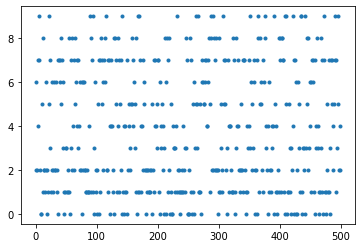

In [9]:
X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [10]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [11]:
true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 aluminum
 window
 frame
 cut
 screen
 easy
 outdoor
 vary
 patio
 rug
Cluster 1:
 fan
 home
 design
 glass
 ceiling
 wall
 help
 metal
 bronze
 clock
Cluster 2:
 light
 watt
 led
 bulb
 volt
 bulbs
 fixture
 lighting
 power
 use
Cluster 3:
 concrete
 stake
 designed
 vary
 fence
 product
 use
 ft
 easy
 water
Cluster 4:
 air
 power
 unit
 ft
 easy
 cooling
 snow
 use
 room
 control
Cluster 5:
 wood
 natural
 bamboo
 painted
 stained
 post
 product
 proposition
 nbsp
 outdoor
Cluster 6:
 insulation
 steel
 toilet
 patio
 flush
 post
 wicker
 track
 stainless
 resistant
Cluster 7:
 door
 easy
 installation
 metal
 provides
 use
 proposition
 nbsp
 residents
 california
Cluster 8:
 cooking
 oven
 cu
 cycle
 water
 capacity
 ft
 low
 wash
 gas
Cluster 9:
 water
 handle
 easy
 design
 watering
 offers
 kitchen
 spray
 features
 head


In [12]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product]) #put it in numbers
    prediction = model.predict(Y) #using those numbers, we find the nearby cluster
    #print(prediction)
    print_cluster(prediction[0]) 



In [13]:
show_recommendations("spray paint")

Cluster 9:
 water
 handle
 easy
 design
 watering
 offers
 kitchen
 spray
 features
 head


In [ ]:
#testing the model

In [15]:
Home = pd.read_csv('test.csv',encoding='latin-1')

In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [62]:
Set1 = pd.read_excel('sheet1.xlsx') #tech
Set1['result'] = 2
Set1.head()

,name,url,rating,price,number_rating,image_url,result
0,Fire TV Stick 4K streaming device with Alexa V...,https://www.amazon.com/Fire-TV-Stick-4K-with-A...,4.7 out of 5 stars,49.99,729233.0,https://images-na.ssl-images-amazon.com/images...,2
1,Fire TV Stick (3rd Gen) with Alexa Voice Remot...,https://www.amazon.com/fire-tv-stick-with-3rd-...,4.7 out of 5 stars,39.99,64054.0,https://images-na.ssl-images-amazon.com/images...,2
2,"Amazon Smart Plug, Works with Alexa â€“ A Cert...",https://www.amazon.com/Amazon-smart-plug-works...,4.7 out of 5 stars,24.99,447314.0,https://images-na.ssl-images-amazon.com/images...,2
3,Fire TV Stick Lite with Alexa Voice Remote Lit...,https://www.amazon.com/fire-tv-stick-lite/dp/B...,4.7 out of 5 stars,29.99,195194.0,https://images-na.ssl-images-amazon.com/images...,2
4,Echo Dot (3rd Gen) - Smart speaker with Alexa ...,https://www.amazon.com/Echo-Dot/dp/B07FZ8S74R/...,4.7 out of 5 stars,39.99,763471.0,https://images-na.ssl-images-amazon.com/images...,2


In [39]:
Set2 = pd.read_excel('sheet2.xlsx') #bedroom
Set2['result'] = 1
Set2.head()

,name,url,rating,price,number_rating,image_url,result
0,Beckham Hotel Collection Bed Pillows for Sleep...,https://www.amazon.com/Beckham-Hotel-Collectio...,4.4 out of 5 stars,39.99,143394,https://images-na.ssl-images-amazon.com/images...,3
1,Bedsure Satin Pillowcase for Hair and Skin Que...,https://www.amazon.com/Bedsure-Satin-Pillowcas...,4.5 out of 5 stars,8.99,202867,https://images-na.ssl-images-amazon.com/images...,3
2,Queen Size Sheet Set - 4 Piece Set - Hotel Lux...,https://www.amazon.com/Queen-Size-Sheet-Set-Br...,4.6 out of 5 stars,29.99,131227,https://images-na.ssl-images-amazon.com/images...,3
3,Mellanni Queen Sheet Set - Hotel Luxury 1800 B...,https://www.amazon.com/Mellanni-Bed-Sheet-Set-...,4.5 out of 5 stars,32.97,254382,https://images-na.ssl-images-amazon.com/images...,3
4,Amazon Basics Lightweight Super Soft Easy Care...,https://www.amazon.com/AmazonBasics-Microfiber...,4.6 out of 5 stars,14.99,282648,https://images-na.ssl-images-amazon.com/images...,3


In [63]:
Set3 = pd.read_excel('sheet3.xlsx') #kitchen
Set3['result'] = 5
Set3.shape
Set3.head()

,name,url,rating,price,number_rating,image_url,result
0,"AGLUCKY Ice Maker Machine for Countertop, Port...",https://www.amazon.com/AGLUCKY-Machine-Counter...,4.5 out of 5 stars,124.99,8511,https://images-na.ssl-images-amazon.com/images...,5
1,"Portable Ice Maker, 26Lbs/24H Self-Cleaning Ic...",https://www.amazon.com/Portable-Ice-Maker-Self...,4.4 out of 5 stars,109.98,175,https://images-na.ssl-images-amazon.com/images...,5
2,Igloo ICEB26BK Portable Electric Countertop 26...,https://www.amazon.com/Igloo-ICEB26BK-Portable...,4.3 out of 5 stars,129.99,8843,https://images-na.ssl-images-amazon.com/images...,5
3,GE Profile Opal | Countertop Nugget Ice Maker ...,https://www.amazon.com/GE-Profile-Countertop-N...,4.5 out of 5 stars,579.00,12996,https://images-na.ssl-images-amazon.com/images...,5
4,Koolatron KTCF155 Compact Chest 5.0 Cubic Feet...,https://www.amazon.com/Koolatron-KTCF155-Chest...,4.5 out of 5 stars,210.00,2977,https://images-na.ssl-images-amazon.com/images...,5


In [64]:
Set4 = pd.read_excel('sheet4.xlsx') #clothes
Set4['result'] = 3
Set4.head()

,name,url,rating,price,number_rating,image_url,result
0,Crocs Unisex-Adult Men's and Women's Classic Clog,https://www.amazon.com/Crocs-Unisex-Classic-Cl...,4.8 out of 5 stars,99.00,240166,https://images-na.ssl-images-amazon.com/images...,3
1,Amoretu Women Summer Tunic Dress V Neck Casual...,https://www.amazon.com/Amoretu-Womens-Loose-Pl...,3.9 out of 5 stars,29.98,35635,https://images-na.ssl-images-amazon.com/images...,3
2,Hanes Men's EcoSmart Sweatshirt,https://www.amazon.com/Hanes-EcoSmart-Fleece-S...,4.6 out of 5 stars,30.17,103045,https://images-na.ssl-images-amazon.com/images...,3
3,"Gildan Men's Crew T-Shirts, Multipack",https://www.amazon.com/Gildan-Mens-T-Shirt-Ass...,4.6 out of 5 stars,52.00,159684,https://images-na.ssl-images-amazon.com/images...,3
4,Fruit of the Loom Men's Coolzone Boxer Briefs,https://www.amazon.com/Fruit-Loom-Coolzone-Bri...,4.7 out of 5 stars,425.00,110172,https://images-na.ssl-images-amazon.com/images...,3


In [65]:
Set5 = pd.read_excel('sheet5.xlsx') #legos
Set5['result'] = 0
Set5.head()

,name,url,rating,price,rating_number,image_url,result
0,LEGO Marvel Infinity Gauntlet 76191 Collectibl...,https://www.amazon.com/LEGO-Infinity-Gauntlet-...,4.9 out of 5 stars,69.95,612,https://images-na.ssl-images-amazon.com/images...,0
1,LEGO Super Mario Adventures with Luigi Starter...,https://www.amazon.com/LEGO-Adventures-Buildin...,4.8 out of 5 stars,59.95,861,https://images-na.ssl-images-amazon.com/images...,0
2,LEGO Friends Forest House 41679 Building Kit; ...,https://www.amazon.com/LEGO-Friends-Forest-Bui...,4.8 out of 5 stars,29.97,85,https://images-na.ssl-images-amazon.com/images...,0
3,LEGO Speed Champions Chevrolet Corvette C8.R R...,https://www.amazon.com/LEGO-Champions-Chevrole...,4.8 out of 5 stars,29.95,141,https://images-na.ssl-images-amazon.com/images...,0
4,"LEGO Disney Ariel, Belle, Cinderella and Tiana...",https://www.amazon.com/LEGO-Cinderella-Storybo...,4.6 out of 5 stars,24.97,59,https://images-na.ssl-images-amazon.com/images...,0


In [66]:
Set6 = pd.read_excel('sheet6.xlsx') #tech
Set6['result'] = 4
Set6.shape

(50, 7)

In [67]:
testingset = pd.concat([Set1, Set2, Set3, Set4, Set5, Set6])

In [25]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(testingset, test_size=0.2)

In [81]:
train2, test2 = train_test_split(testingset, test_size=0.2)

In [26]:
train

,name,url,rating,price,number_rating,image_url,result,rating_number,query
30,"Yankee Candle Large Jar Candle, Autumn Wreath",https://www.amazon.com/Yankee-Candle-Large-Aut...,4.7 out of 5 stars,18.88,22671.0,https://images-na.ssl-images-amazon.com/images...,1,NaN,NaN
29,LEGO NINJAGO Legacy Fire Dragon Attack 71753 N...,https://www.amazon.com/LEGO-NINJAGO-Playset-Bu...,5.0 out of 5 stars,49.95,NaN,https://images-na.ssl-images-amazon.com/images...,5,54.0,NaN
10,"Echo Dot (4th Gen, 2020 release) | Smart speak...",https://www.amazon.com/all-new-Echo-Dot/dp/B07...,4.7 out of 5 stars,49.99,358784.0,https://images-na.ssl-images-amazon.com/images...,0,NaN,NaN
45,LEGO Disney Anna and Elsaâ€™s Frozen Wonderlan...,https://www.amazon.com/LEGO-Wonderland-Buildin...,4.6 out of 5 stars,39.97,NaN,https://images-na.ssl-images-amazon.com/images...,5,11.0,NaN
47,"Midea MRC050S0AWW Chest Freezer, 5.0 Cubic Fee...",https://www.amazon.com/midea-MRC050S0AWW-Chest...,4.6 out of 5 stars,299.00,885.0,https://images-na.ssl-images-amazon.com/images...,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...
28,Ring Chime,https://www.amazon.com/Ring-Chime/dp/B07WML1QM...,4.6 out of 5 stars,29.99,45622.0,https://images-na.ssl-images-amazon.com/images...,0,NaN,NaN
44,"Gildan Men's Heavy Cotton T-Shirt, Style G5000...",https://www.amazon.com/Gildan-Heavy-Cotton-T-S...,4.5 out of 5 stars,28.99,29150.0,https://images-na.ssl-images-amazon.com/images...,3,NaN,NaN
19,THERMOS FUNTAINER 10 Ounce Stainless Steel Vac...,https://www.amazon.com/THERMOS-FUNTAINER-Ounce...,4.7 out of 5 stars,16.99,926.0,https://images-na.ssl-images-amazon.com/images...,1,NaN,NaN
17,Ice Maker Portable Ice Maker Countertop Ice Ma...,https://www.amazon.com/Portable-Countertop-Mac...,4.7 out of 5 stars,92.55,21.0,https://images-na.ssl-images-amazon.com/images...,2,NaN,NaN


In [27]:
trainingset = train[train['name'].notna()]
trainingset.head()

,name,url,rating,price,number_rating,image_url,result,rating_number,query
30,"Yankee Candle Large Jar Candle, Autumn Wreath",https://www.amazon.com/Yankee-Candle-Large-Aut...,4.7 out of 5 stars,18.88,22671.0,https://images-na.ssl-images-amazon.com/images...,1,NaN,NaN
29,LEGO NINJAGO Legacy Fire Dragon Attack 71753 N...,https://www.amazon.com/LEGO-NINJAGO-Playset-Bu...,5.0 out of 5 stars,49.95,NaN,https://images-na.ssl-images-amazon.com/images...,5,54.0,NaN
10,"Echo Dot (4th Gen, 2020 release) | Smart speak...",https://www.amazon.com/all-new-Echo-Dot/dp/B07...,4.7 out of 5 stars,49.99,358784.0,https://images-na.ssl-images-amazon.com/images...,0,NaN,NaN
45,LEGO Disney Anna and Elsaâ€™s Frozen Wonderlan...,https://www.amazon.com/LEGO-Wonderland-Buildin...,4.6 out of 5 stars,39.97,NaN,https://images-na.ssl-images-amazon.com/images...,5,11.0,NaN
47,"Midea MRC050S0AWW Chest Freezer, 5.0 Cubic Fee...",https://www.amazon.com/midea-MRC050S0AWW-Chest...,4.6 out of 5 stars,299.00,885.0,https://images-na.ssl-images-amazon.com/images...,2,NaN,NaN


In [55]:
vectorizer = TfidfVectorizer(stop_words='english')
trainingset[['name', 'result']]
X1 = vectorizer.fit_transform(trainingset['name'])
X1

<204x971 sparse matrix of type '<class 'numpy.float64'>'
	with 1873 stored elements in Compressed Sparse Row format>

In [76]:
train[['name', 'result']]

,name,result
30,"Yankee Candle Large Jar Candle, Autumn Wreath",1
29,LEGO NINJAGO Legacy Fire Dragon Attack 71753 N...,5
10,"Echo Dot (4th Gen, 2020 release) | Smart speak...",0
45,LEGO Disney Anna and Elsaâ€™s Frozen Wonderlan...,5
47,"Midea MRC050S0AWW Chest Freezer, 5.0 Cubic Fee...",2
...,...,...
28,Ring Chime,0
44,"Gildan Men's Heavy Cotton T-Shirt, Style G5000...",3
19,THERMOS FUNTAINER 10 Ounce Stainless Steel Vac...,1
17,Ice Maker Portable Ice Maker Countertop Ice Ma...,2


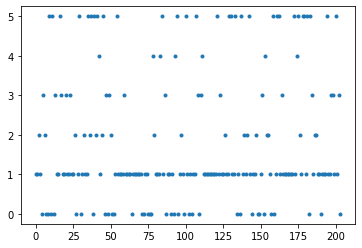

In [59]:
X=X1

kmeans = KMeans(n_clusters = 6, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [60]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [61]:
true_k = 6

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print_cluster(i)

#cluster 0: games
#cluster 1: bed
#cluster 2: tech
#cluster 3: clothes
#cluster 4: tech 2
#cluster 5: kitchen

#if clusters are 5, the tech clusters combine into one, thats good. We can intuitively tell its working.
#However, we still have to prove it numerically.

Top terms per cluster:
Cluster 0:
 lego
 building
 kit
 set
 toy
 friends
 sheets
 mario
 marvel
 collectible
Cluster 1:
 women
 shower
 curtain
 72
 8g
 sunglasses
 scale
 lite
 mattress
 digital
Cluster 2:
 security
 camera
 hd
 blink
 year
 weather
 resistant
 outdoor
 wireless
 stick
Cluster 3:
 men
 pack
 shirt
 gildan
 hanes
 style
 cotton
 sweatshirt
 fleece
 sleeve
Cluster 4:
 alexa
 tv
 gen
 smart
 portable
 display
 echo
 freezer
 amazon
 ring
Cluster 5:
 ice
 maker
 countertop
 machine
 self
 cleaning
 ready
 cubes
 portable
 function


In [100]:
for i in range(true_k):
    print_cluster(i)

Cluster 0:
 lego
 building
 kit
 set
 toy
 friends
 sheets
 mario
 marvel
 collectible
Cluster 1:
 women
 shower
 curtain
 72
 8g
 sunglasses
 scale
 lite
 mattress
 digital
Cluster 2:
 security
 camera
 hd
 blink
 year
 weather
 resistant
 outdoor
 wireless
 stick
Cluster 3:
 men
 pack
 shirt
 gildan
 hanes
 style
 cotton
 sweatshirt
 fleece
 sleeve
Cluster 4:
 alexa
 tv
 gen
 smart
 portable
 display
 echo
 freezer
 amazon
 ring
Cluster 5:
 ice
 maker
 countertop
 machine
 self
 cleaning
 ready
 cubes
 portable
 function


In [99]:
predictions = list(model.fit_predict(X1))

In [82]:
test2

,name,url,rating,price,number_rating,image_url,result,rating_number,query
38,NaN,https://www.amazon.com/LEGO-NINJAGO-Building-S...,4.6 out of 5 stars,129.99,24.0,https://images-na.ssl-images-amazon.com/images...,4,NaN,LEGO NINJAGO Hydro Bounty 71756 Building Kit; ...
0,LEGO Marvel Infinity Gauntlet 76191 Collectibl...,https://www.amazon.com/LEGO-Infinity-Gauntlet-...,4.9 out of 5 stars,69.95,NaN,https://images-na.ssl-images-amazon.com/images...,0,612.0,NaN
24,"RUNNING GIRL Sports Bra for Women, Criss-Cross...",https://www.amazon.com/RUNNING-GIRL-Criss-Cros...,4.4 out of 5 stars,22.99,20073.0,https://images-na.ssl-images-amazon.com/images...,3,NaN,NaN
9,Introducing Fire TV Stick 4K Max streaming dev...,https://www.amazon.com/fire-tv-stick-4k-max-wi...,NaN,54.99,NaN,https://images-na.ssl-images-amazon.com/images...,2,NaN,NaN
48,LEGO Disney Mickey and Friends Minnie Mouseâ€™...,https://www.amazon.com/LEGO-Disney-Mickey-Frie...,4.4 out of 5 stars,19.99,NaN,https://images-na.ssl-images-amazon.com/images...,0,26.0,NaN
22,NaN,https://www.amazon.com/LEGO-Wildlife-Operation...,5.0 out of 5 stars,89.95,4.0,https://images-na.ssl-images-amazon.com/images...,4,NaN,LEGO City Wildlife Rescue Operation 60302 Buil...
5,SafeRest Queen Size Premium Hypoallergenic Wat...,https://www.amazon.com/SafeRest-Hypoallergenic...,4.6 out of 5 stars,29.95,192938.0,https://images-na.ssl-images-amazon.com/images...,3,NaN,NaN
38,MIHOLL Womenâ€™s Long Sleeve Tops Lace Casual ...,https://www.amazon.com/MIHOLL-Womens-Casual-Ba...,4.3 out of 5 stars,22.99,18090.0,https://images-na.ssl-images-amazon.com/images...,3,NaN,NaN
33,Scotts Turf Builder WinterGuard Fall Weed and ...,https://www.amazon.com/Scotts-50240-Turf-Build...,4.6 out of 5 stars,62.00,3876.0,https://images-na.ssl-images-amazon.com/images...,3,NaN,NaN
42,"Amazon Basics Foldable, 14"" Black Metal Platfo...",https://www.amazon.com/AmazonBasics-Foldable-P...,4.8 out of 5 stars,99.99,65360.0,https://images-na.ssl-images-amazon.com/images...,3,NaN,NaN


In [98]:
maintest = test2[test2['name'].notna()]
maintest

,name,url,rating,price,number_rating,image_url,result,rating_number,query
0,LEGO Marvel Infinity Gauntlet 76191 Collectibl...,https://www.amazon.com/LEGO-Infinity-Gauntlet-...,4.9 out of 5 stars,69.95,NaN,https://images-na.ssl-images-amazon.com/images...,0,612.0,NaN
24,"RUNNING GIRL Sports Bra for Women, Criss-Cross...",https://www.amazon.com/RUNNING-GIRL-Criss-Cros...,4.4 out of 5 stars,22.99,20073.0,https://images-na.ssl-images-amazon.com/images...,3,NaN,NaN
9,Introducing Fire TV Stick 4K Max streaming dev...,https://www.amazon.com/fire-tv-stick-4k-max-wi...,NaN,54.99,NaN,https://images-na.ssl-images-amazon.com/images...,2,NaN,NaN
48,LEGO Disney Mickey and Friends Minnie Mouseâ€™...,https://www.amazon.com/LEGO-Disney-Mickey-Frie...,4.4 out of 5 stars,19.99,NaN,https://images-na.ssl-images-amazon.com/images...,0,26.0,NaN
5,SafeRest Queen Size Premium Hypoallergenic Wat...,https://www.amazon.com/SafeRest-Hypoallergenic...,4.6 out of 5 stars,29.95,192938.0,https://images-na.ssl-images-amazon.com/images...,3,NaN,NaN
38,MIHOLL Womenâ€™s Long Sleeve Tops Lace Casual ...,https://www.amazon.com/MIHOLL-Womens-Casual-Ba...,4.3 out of 5 stars,22.99,18090.0,https://images-na.ssl-images-amazon.com/images...,3,NaN,NaN
33,Scotts Turf Builder WinterGuard Fall Weed and ...,https://www.amazon.com/Scotts-50240-Turf-Build...,4.6 out of 5 stars,62.00,3876.0,https://images-na.ssl-images-amazon.com/images...,3,NaN,NaN
42,"Amazon Basics Foldable, 14"" Black Metal Platfo...",https://www.amazon.com/AmazonBasics-Foldable-P...,4.8 out of 5 stars,99.99,65360.0,https://images-na.ssl-images-amazon.com/images...,3,NaN,NaN
8,LEGO Speed Champions McLaren Elva 76902 Buildi...,https://www.amazon.com/LEGO-Champions-McLaren-...,4.9 out of 5 stars,19.95,NaN,https://images-na.ssl-images-amazon.com/images...,0,43.0,NaN
34,LEGO City Wildlife Rescue ATV 60300 Building K...,https://www.amazon.com/LEGO-Wildlife-Rescue-Bu...,4.9 out of 5 stars,9.30,NaN,https://images-na.ssl-images-amazon.com/images...,0,92.0,NaN


In [96]:
model.fit_predict(vectorizer.fit_transform(maintest['name']))

array([0, 2, 2, 1, 5, 2, 2, 2, 0, 0, 1, 2, 5, 2, 2, 4, 2, 2, 3, 4, 2, 2,
       2, 0, 4, 4, 2, 1, 5, 2, 1, 1, 2, 1, 1, 2, 2, 1, 3, 3, 1, 0, 2, 1,
       1, 2, 2, 2, 2, 2, 4], dtype=int32)